# Project Overview
As our company explores new avenues for growth and diversification, we are venturing into Aviation. We wish to establish a presence in both commercial and private air travel. This outlines a comprehensive risk assesment of various aircraft types, aimed at identifying the safest and most reliable options for entry into the market.

# Objective
The primary objective is to assess the risk associated with different aircraft model and provide recommendations. This will enable the operators to provide safe, reliable and efficient operations.

# Methodology
A multi-faceted approach was applied:
- Review of Aviation safety databases such as the Aviation Safety Network reports.
- Analysis of historical Accident data.
- Evaluation of operational and maintenance costs.
- Data cleaning, date conversions to help in assessing the trends.



In [81]:
#importing libraries
import warnings
warnings.simplefilter(action= 'ignore', category=UserWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [82]:
# Load the dataset
df = pd.read_csv('Data Set\AviationData.csv', encoding='latin1', low_memory=False)
df.head()
# Display the first few rows of the dataset


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\USER\AppData\Local\Temp\ipykernel_18276\1547791877.py:2: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('Data Set\AviationData.csv', encoding='latin1', low_memory=False)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
df.shape
# Display the shape of the dataset (number of rows and columns)


(88889, 31)

In [ ]:
df.info()
# Get the information about the dataset, including data types and non-null counts
# Display the first few rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [ ]:
# displaying the last 10 rows of the dataset
df.tail(10) 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,NaN,NaN,...,NaN,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,NaN,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [ ]:
# Display the few rows of the dataset on weather conditions.
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [87]:
# Checking Missing Values 
df.isnull().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [88]:
# Check for duplicate rows in the dataset
df.duplicated().sum()
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [89]:
# Dropping Columns we wont be needing for analysis and they also have lots of missing values

df.drop(['Schedule', 'Air.carrier' ,'FAR.Description', 'Longitude', 'Latitude', 'Airport.Code', 'Airport.Name'], axis=1)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
# Adding a new column to the dataset 
df['Accident_count']=1

In [91]:
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Accident_count
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1


In [92]:
#Removing Unwanted Characters from the columns
df["Weather.Condition"]= df["Weather.Condition"].str.replace("Unk","Not specified")
df["Weather.Condition"]= df["Weather.Condition"].str.replace("UNK","Not specified")
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Accident_count
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,Not specified,Cruise,Probable Cause,NaN,1
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,Not specified,Unknown,Probable Cause,19-09-1996,1
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,1
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,1
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1


DATA ANALYSIS

1. Accidents by weather conditions or Airline

Data was grouped into different weather conditions to help determine under which weather conditions were there many accidents.

In [93]:
#Grouping the data by Weather Condition and counting the number of occurrences
df.groupby('Weather.Condition').size()

Weather.Condition
IMC               5976
Not specified     1118
VMC              77303
dtype: int64

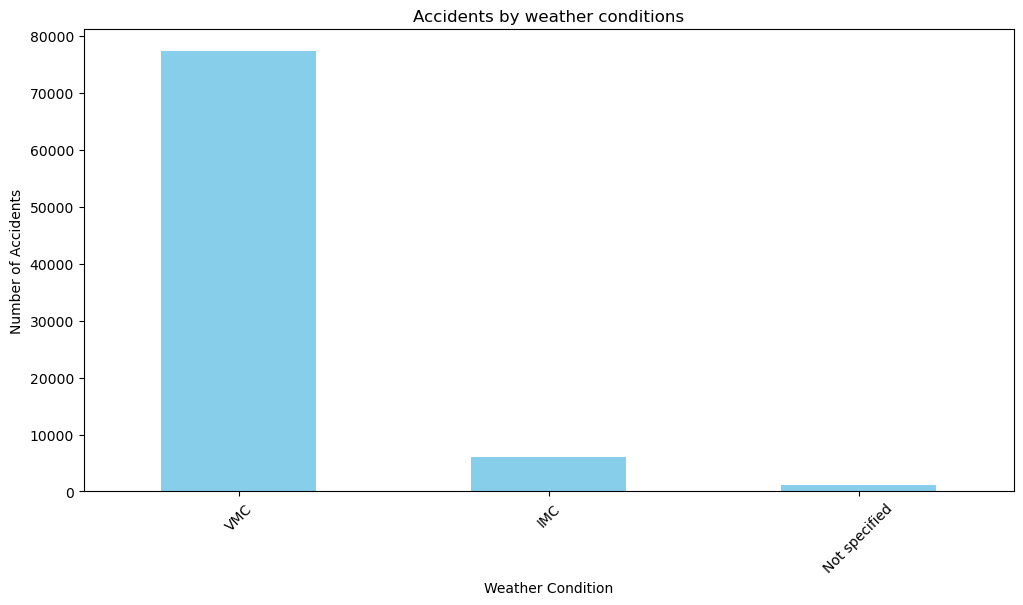

In [94]:
weather_condition_counts = df['Weather.Condition'].value_counts()
plt.figure(figsize=(12, 6))
weather_condition_counts.plot(kind='bar',title="Accidents by weather conditions",color='skyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show() 

Conclusion on Accidents by Weather Conditions
Aviation accidents are notably influenced by weather conditions, with clear skies (VMC) accounting for the majority due to higher flight activity, while adverse conditions (IMC) pose significant risks, underscoring the importance of robust pilot training and advanced navigation systems.

2. Group accidents by Location to find high risk areas


Data was grouped into count of accidents per country. This helped us determine which countries had most accidents.

In [95]:
#checking the number of accidents by country
accidents_by_country = df['Country'].value_counts()

accidents_by_country

Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

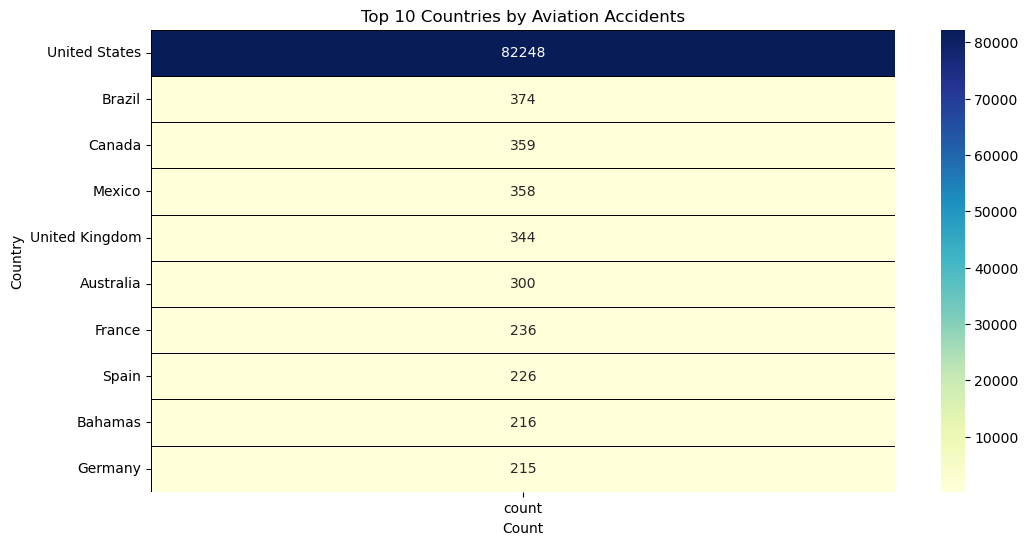

In [96]:
# Get the top 10 countries by accident count
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.heatmap(
    top_countries.to_frame(),  # Convert Series to DataFrame
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    linecolor='black',
    linewidths=0.5, 
    cbar=True,  # Disable color bar
)
plt.title('Top 10 Countries by Aviation Accidents')
plt.xlabel('Count')  # This will label the colorbar if you had cbar=True
plt.ylabel('Country') 
plt.yticks(rotation=0)  # Rotate y-axis labels for better readability
plt.show()

Conclusion on Countries with Most Aviation Accidents

The analysis of aviation accidents by country highlights significant regional disparities, with certain nations, such as the USA, dominating due to high aviation traffic. However, other countries also reveal notable contributions, underscoring the global nature of aviation safety challenges. Targeted interventions and improved safety protocols across all regions are essential to mitigate risks and enhance aviation safety worldwide.

3. Aircraft with most Accidents

Data was grouped into number of accidents by each aircraft. This will help in determining which aircraft makes are safe and which had many accidents.

In [97]:
df['Make'].value_counts().head(10)

Make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: count, dtype: int64

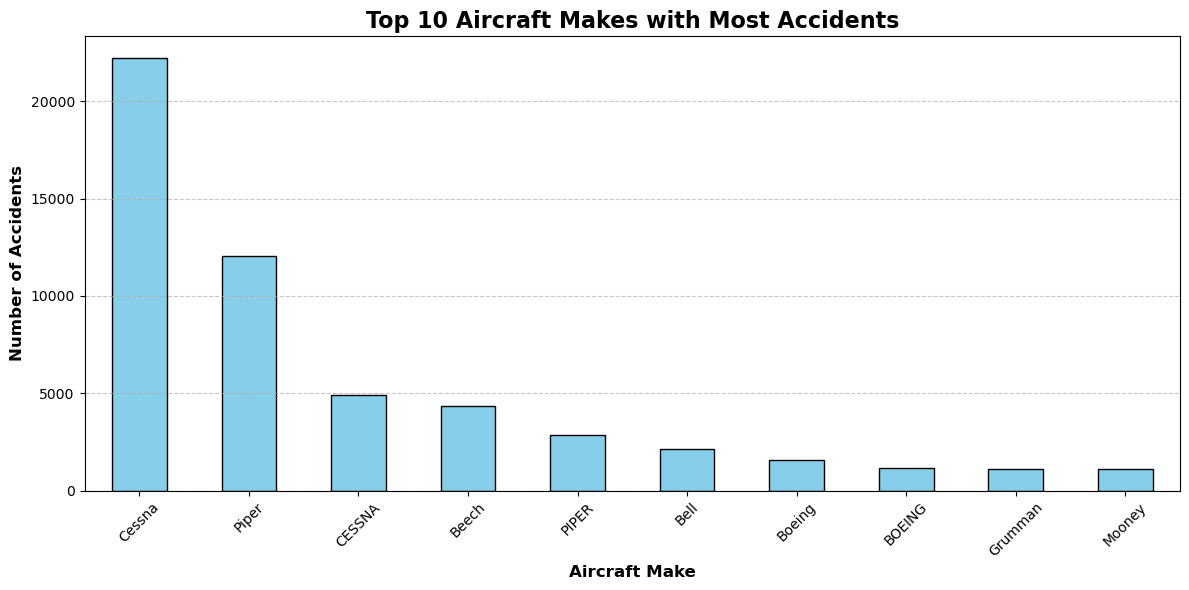

In [98]:
# Get the top 10 aircraft makes
top_makes = df['Make'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(12, 6))
top_makes.plot(kind='bar', color='skyblue', edgecolor='black')



# Add title and labels
plt.title('Top 10 Aircraft Makes with Most Accidents', fontsize=16, fontweight='bold')
plt.xlabel('Aircraft Make', fontsize=12, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()

Conclusion in Aircrafts with most Accidents.

The analysis shows that the top 10 aircraft manufacturers with the most accidents are Cessna, Piper, Beech, Boeing, Bell, Mooney, Hughes, Grumman, Robinson, and McDonnell Douglas. These manufacturers contribute significantly to aviation accident data, underscoring the need to investigate factors such as usage patterns, maintenance practices, and potential design challenges associated with these specific makes to enhance safety measures.

4.Count the occurrences of each phase of flight

Data was grouped into different phases of flight and the number of accidents that occured. This helps to make a conclusion on where to be more careful and have training to the crew involved.

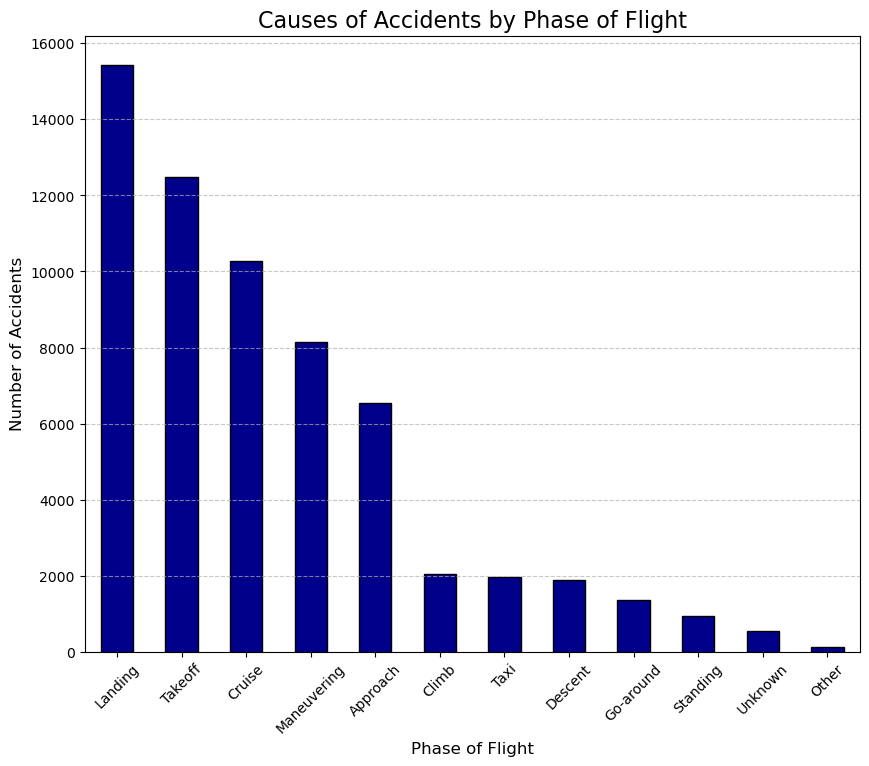

In [99]:
causes = df['Broad.phase.of.flight'].value_counts()

# Plot as a bar chart
plt.figure(figsize=(10, 8))
causes.plot(kind='bar', color='darkblue', edgecolor='black')

# Add title and labels
plt.title('Causes of Accidents by Phase of Flight', fontsize=16)
plt.xlabel('Phase of Flight', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.show()

Conclusion on Causes of Accidents by Phase of flight

The analysis reveals that accidents predominantly occur during critical phases of flight such as landing and takeoff, underscoring the need for enhanced pilot training and improved safety protocols during these high-risk moments. It also gives the significance of counter checking the functionalities of all controls before flight by the pilot and the crew.

In [100]:
df.to_csv('Cleaned_data.csv', index=False, encoding='utf-8-sig')